<a href="https://colab.research.google.com/github/AxlSyr/MachineLearning/blob/main/Practica3_Scrap_EDAWoAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/master/02_Analisis_Estadistico/notebook/practices/Practica3_Scrap_EDAWoAns.ipynb)

<h1><center>Práctica 3 de Módulo 2</center><h1>

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [2]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [3]:
r = requests.get('https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.')
r

<Response [200]>

In [4]:
html = r.text

In [5]:
r

<Response [200]>

## Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

## Paso 3: busque los datos que desea extraer

Extraigamos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [6]:
parsed = BeautifulSoup(r.text, "html.parser")

In [7]:
main_box=parsed.find_all("div", {"class":"_13oc-S"})

In [8]:
len(main_box)

24

In [9]:
box=main_box[0]

In [10]:
box

<div class="_13oc-S"><div data-id="COMFYHT7FZYTWEPV" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/vaio-se-series-core-i5-8th-gen-8-gb-512-gb-ssd-windows-10-home-np14v1in004p-thin-light-laptop/p/itmb243391b412c9?pid=COMFYHT7FZYTWEPV&amp;lid=LSTCOMFYHT7FZYTWEPVO5BBOD&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_AdyJUjMpC4xMtGEeFiBcNm3WLfO8gtUmiO74AIDgSQA6eahCb0DJUcYq1PErWDpQAYX7O8OdcaPCrQr6nRIMlw%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=4qw5fyviyo0000001619713459949&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="Vaio SE Series Core i5 8th Gen - (8 GB/512 GB SSD/Windows 10 Home) NP14V1IN004P Thin and Light Laptop" class="_396cs4" src="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/img/placeholder

In [11]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
rating = box.find('div', {'class':'_3LWZlK'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [12]:
print(title,price,rating)

Vaio SE Series Core i5 8th Gen - (8 GB/512 GB SSD/Windows 10 Home) NP14V1IN004P Thin and Light Laptop 62,990 4


In [13]:
data_list=[]
for box in main_box:
    temp_dict={
      'title': box.find('div', {'class':'_4rR01T'}).text.strip(),
      'rating': box.find('div', {'class':'_3LWZlK'}).text.strip() if box.find('div', {'class':'_3LWZlK'}) is not None else 'None',
      'price': box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()
    }
    
    data_list.append(temp_dict)

In [14]:
data_list

[{'price': '62,990',
  'rating': '4',
  'title': 'Vaio SE Series Core i5 8th Gen - (8 GB/512 GB SSD/Windows 10 Home) NP14V1IN004P Thin and Light Laptop'},
 {'price': '51,490',
  'rating': '4.2',
  'title': 'HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (8 GB/1 TB HDD/Windows 10 Home/4 GB Graphics/NVIDIA GeFor...'},
 {'price': '27,990',
  'rating': '4',
  'title': 'Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U - (4 GB/1 TB HDD/Windows 10 Home) S145-15API Laptop'},
 {'price': '36,990',
  'rating': '4.2',
  'title': 'HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) 14s-cf3074TU Thin and Light Laptop'},
 {'price': '42,990',
  'rating': '4.2',
  'title': 'Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U - (8 GB/512 GB SSD/Windows 10 Home) S145-15API Laptop'},
 {'price': '55,990',
  'rating': '4.5',
  'title': 'acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...'},
 {'price': '23,990',
  'rating': '4',
  'title': 'HP 15s Celeron Dual C

In [15]:
len(data_list)

24

## Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [16]:
df = pd.DataFrame(data_list)

In [17]:
df

,title,rating,price
0,Vaio SE Series Core i5 8th Gen - (8 GB/512 GB ...,4,"62,990"
1,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,4.2,"51,490"
2,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U - ...,4,"27,990"
3,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"36,990"
4,Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U - ...,4.2,"42,990"
5,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,4.5,"55,990"
6,HP 15s Celeron Dual Core - (4 GB/1 TB HDD/Wind...,4,"23,990"
7,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,4.5,"54,990"
8,acer Predator Helios 300 Core i7 10th Gen - (1...,4.7,"1,16,990"
9,acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.4,"50,990"


In [18]:
df.to_csv("datos_compus.csv", index=False, encoding='utf-8')

## Paso 5: Un poco de EDA y visualización de este archivo

In [19]:
laptop_df = pd.read_csv("datos_compus.csv", sep=None, thousands=',', engine='python')

In [20]:
laptop_df

,title,rating,price
0,Vaio SE Series Core i5 8th Gen - (8 GB/512 GB ...,4.0,62990
1,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,4.2,51490
2,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U - ...,4.0,27990
3,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,36990
4,Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U - ...,4.2,42990
5,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,4.5,55990
6,HP 15s Celeron Dual Core - (4 GB/1 TB HDD/Wind...,4.0,23990
7,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,4.5,54990
8,acer Predator Helios 300 Core i7 10th Gen - (1...,4.7,116990
9,acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.4,50990


In [21]:
laptop_df.shape

(24, 3)

In [22]:
laptop_df.dtypes

title      object
rating    float64
price       int64
dtype: object

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [23]:
laptop_df = pd.read_csv("datos_compus.csv", sep=None, thousands=',', engine='python')

In [24]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,spec
0,4.0,62990,Vaio SE Series Core i5 8th Gen,(8 GB/512 GB SSD/Windows 10 Home) NP14V1IN004...
1,4.2,51490,HP Pavilion Gaming Ryzen 5 Quad Core 3550H,(8 GB/1 TB HDD/Windows 10 Home/4 GB Graphics/...
2,4.0,27990,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,(4 GB/1 TB HDD/Windows 10 Home) S145-15API La...
3,4.2,36990,HP 14s Core i3 10th Gen,(8 GB/256 GB SSD/Windows 10 Home) 14s-cf3074T...
4,4.2,42990,Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U,(8 GB/512 GB SSD/Windows 10 Home) S145-15API ...


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [25]:
laptop_df['RAM'], laptop_df['Storage'] = laptop_df['spec'].str.split('(', 1).str
laptop_df['RAM'], laptop_df['Storage'] = laptop_df['Storage'].str.split('/', 1).str
laptop_df['Storage'], laptop_df['OS'] = laptop_df['Storage'].str.split('/', 1).str
laptop_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


,rating,price,model,spec,RAM,Storage,OS
0,4.0,62990,Vaio SE Series Core i5 8th Gen,(8 GB/512 GB SSD/Windows 10 Home) NP14V1IN004...,8 GB,512 GB SSD,Windows 10 Home) NP14V1IN004P Thin and Light L...
1,4.2,51490,HP Pavilion Gaming Ryzen 5 Quad Core 3550H,(8 GB/1 TB HDD/Windows 10 Home/4 GB Graphics/...,8 GB,1 TB HDD,Windows 10 Home/4 GB Graphics/NVIDIA GeFor...
2,4.0,27990,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,(4 GB/1 TB HDD/Windows 10 Home) S145-15API La...,4 GB,1 TB HDD,Windows 10 Home) S145-15API Laptop
3,4.2,36990,HP 14s Core i3 10th Gen,(8 GB/256 GB SSD/Windows 10 Home) 14s-cf3074T...,8 GB,256 GB SSD,Windows 10 Home) 14s-cf3074TU Thin and Light L...
4,4.2,42990,Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U,(8 GB/512 GB SSD/Windows 10 Home) S145-15API ...,8 GB,512 GB SSD,Windows 10 Home) S145-15API Laptop
5,4.5,55990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,(8 GB/512 GB SSD/Windows 10 Home/4 GB Graphic...,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...
6,4.0,23990,HP 15s Celeron Dual Core,(4 GB/1 TB HDD/Windows 10 Home) 15s-du1044tu ...,4 GB,1 TB HDD,Windows 10 Home) 15s-du1044tu Thin and Light L...
7,4.5,54990,MSI GF63 Thin Core i5 9th Gen,(8 GB/512 GB SSD/Windows 10 Home/4 GB Graphic...,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...
8,4.7,116990,acer Predator Helios 300 Core i7 10th Gen,(16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 ...,16 GB,1 TB HDD,256 GB SSD/Windows 10 Home/6 GB Graphics/N...
9,4.4,50990,acer Aspire 7 Ryzen 5 Quad Core 3550H,(8 GB/512 GB SSD/Windows 10 Home/4 GB Graphic...,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...


Continuemos hasta conseguir lo siguiente...

In [26]:
laptop_df['OS'], laptop_df['spec'] = laptop_df['OS'].str.split(')', 1).str
laptop_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,spec,RAM,Storage,OS
0,4.0,62990,Vaio SE Series Core i5 8th Gen,NP14V1IN004P Thin and Light Laptop,8 GB,512 GB SSD,Windows 10 Home
1,4.2,51490,HP Pavilion Gaming Ryzen 5 Quad Core 3550H,NaN,8 GB,1 TB HDD,Windows 10 Home/4 GB Graphics/NVIDIA GeFor...
2,4.0,27990,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,S145-15API Laptop,4 GB,1 TB HDD,Windows 10 Home
3,4.2,36990,HP 14s Core i3 10th Gen,14s-cf3074TU Thin and Light Laptop,8 GB,256 GB SSD,Windows 10 Home
4,4.2,42990,Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U,S145-15API Laptop,8 GB,512 GB SSD,Windows 10 Home
5,4.5,55990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,NaN,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...
6,4.0,23990,HP 15s Celeron Dual Core,15s-du1044tu Thin and Light Laptop,4 GB,1 TB HDD,Windows 10 Home
7,4.5,54990,MSI GF63 Thin Core i5 9th Gen,NaN,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...
8,4.7,116990,acer Predator Helios 300 Core i7 10th Gen,NaN,16 GB,1 TB HDD,256 GB SSD/Windows 10 Home/6 GB Graphics/N...
9,4.4,50990,acer Aspire 7 Ryzen 5 Quad Core 3550H,NaN,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...


In [27]:
laptop_df['OS'], laptop_df['Other_Info'] = laptop_df['OS'].str.split('/', 1).str
laptop_df['Other_Info'] = laptop_df['spec'].astype(str) + ' ' + laptop_df['Other_Info'].astype(str)
del laptop_df['spec']
laptop_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,RAM,Storage,OS,Other_Info
0,4.0,62990,Vaio SE Series Core i5 8th Gen,8 GB,512 GB SSD,Windows 10 Home,NP14V1IN004P Thin and Light Laptop nan
1,4.2,51490,HP Pavilion Gaming Ryzen 5 Quad Core 3550H,8 GB,1 TB HDD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeFor...
2,4.0,27990,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,4 GB,1 TB HDD,Windows 10 Home,S145-15API Laptop nan
3,4.2,36990,HP 14s Core i3 10th Gen,8 GB,256 GB SSD,Windows 10 Home,14s-cf3074TU Thin and Light Laptop nan
4,4.2,42990,Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U,8 GB,512 GB SSD,Windows 10 Home,S145-15API Laptop nan
5,4.5,55990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForce ...
6,4.0,23990,HP 15s Celeron Dual Core,4 GB,1 TB HDD,Windows 10 Home,15s-du1044tu Thin and Light Laptop nan
7,4.5,54990,MSI GF63 Thin Core i5 9th Gen,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForce GTX 1650...
8,4.7,116990,acer Predator Helios 300 Core i7 10th Gen,16 GB,1 TB HDD,256 GB SSD,nan Windows 10 Home/6 GB Graphics/N...
9,4.4,50990,acer Aspire 7 Ryzen 5 Quad Core 3550H,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForce ...


## Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [28]:
laptop_df.isnull()

,rating,price,model,RAM,Storage,OS,Other_Info
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [29]:
laptop_df.isnull().sum()

rating        0
price         0
model         0
RAM           0
Storage       0
OS            0
Other_Info    0
dtype: int64

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [30]:
less = laptop_df[laptop_df['rating'] <= 4]
less

,rating,price,model,RAM,Storage,OS,Other_Info
0,4.0,62990,Vaio SE Series Core i5 8th Gen,8 GB,512 GB SSD,Windows 10 Home,NP14V1IN004P Thin and Light Laptop nan
2,4.0,27990,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,4 GB,1 TB HDD,Windows 10 Home,S145-15API Laptop nan
6,4.0,23990,HP 15s Celeron Dual Core,4 GB,1 TB HDD,Windows 10 Home,15s-du1044tu Thin and Light Laptop nan
20,4.0,23990,HP 15s Dual Core 3020e,4 GB,1 TB HDD,Windows 10 Home,15s-GY0003AU Thin and Light Laptop nan


In [31]:
more = laptop_df[laptop_df['rating'] >= 3.5]
more = laptop_df[laptop_df['price'] >= 30000]
more = laptop_df[laptop_df['price'] <= 40000]
more

,rating,price,model,RAM,Storage,OS,Other_Info
2,4.0,27990,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,4 GB,1 TB HDD,Windows 10 Home,S145-15API Laptop nan
3,4.2,36990,HP 14s Core i3 10th Gen,8 GB,256 GB SSD,Windows 10 Home,14s-cf3074TU Thin and Light Laptop nan
6,4.0,23990,HP 15s Celeron Dual Core,4 GB,1 TB HDD,Windows 10 Home,15s-du1044tu Thin and Light Laptop nan
12,4.1,33990,Lenovo Ideapad S145 Core i3 10th Gen,4 GB,256 GB SSD,Windows 10 Home,S145-15IIL Thin and Light Lap... nan
20,4.0,23990,HP 15s Dual Core 3020e,4 GB,1 TB HDD,Windows 10 Home,15s-GY0003AU Thin and Light Laptop nan


---------

### Visualización de los datos

In [32]:
laptop_df

,rating,price,model,RAM,Storage,OS,Other_Info
0,4.0,62990,Vaio SE Series Core i5 8th Gen,8 GB,512 GB SSD,Windows 10 Home,NP14V1IN004P Thin and Light Laptop nan
1,4.2,51490,HP Pavilion Gaming Ryzen 5 Quad Core 3550H,8 GB,1 TB HDD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeFor...
2,4.0,27990,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,4 GB,1 TB HDD,Windows 10 Home,S145-15API Laptop nan
3,4.2,36990,HP 14s Core i3 10th Gen,8 GB,256 GB SSD,Windows 10 Home,14s-cf3074TU Thin and Light Laptop nan
4,4.2,42990,Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U,8 GB,512 GB SSD,Windows 10 Home,S145-15API Laptop nan
5,4.5,55990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForce ...
6,4.0,23990,HP 15s Celeron Dual Core,4 GB,1 TB HDD,Windows 10 Home,15s-du1044tu Thin and Light Laptop nan
7,4.5,54990,MSI GF63 Thin Core i5 9th Gen,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForce GTX 1650...
8,4.7,116990,acer Predator Helios 300 Core i7 10th Gen,16 GB,1 TB HDD,256 GB SSD,nan Windows 10 Home/6 GB Graphics/N...
9,4.4,50990,acer Aspire 7 Ryzen 5 Quad Core 3550H,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForce ...


Realizaremos una gráfica de barras de precio vs rating

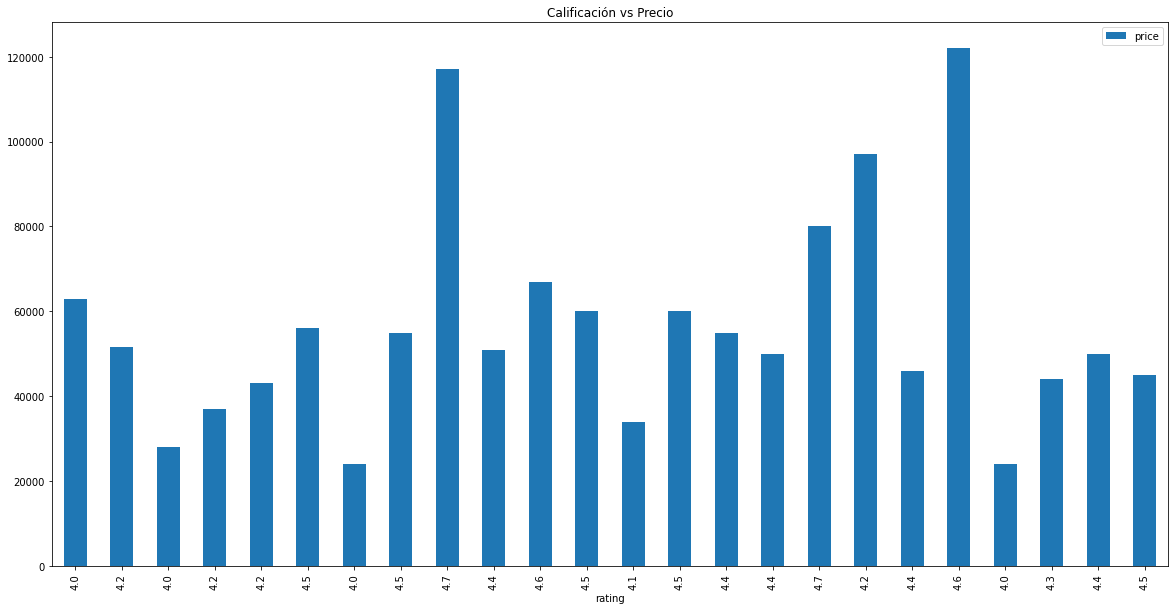

In [33]:
laptop_df.plot.bar('rating', 'price', title='Calificación vs Precio', figsize=(20, 10))

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

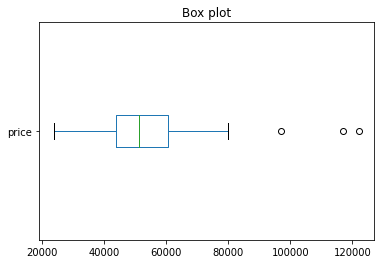

In [34]:
laptop_df.plot.box(x='rating', title='Box plot', vert=False)

## ¿Les ha salido algún discordante visual a ustedes?

In [35]:
laptop_df[laptop_df['OS'].str.contains('SSD')]

,rating,price,model,RAM,Storage,OS,Other_Info
8,4.7,116990,acer Predator Helios 300 Core i7 10th Gen,16 GB,1 TB HDD,256 GB SSD,nan Windows 10 Home/6 GB Graphics/N...
11,4.5,59990,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600H,8 GB,1 TB HDD,256 GB SSD,nan Windows 10 Home/4 GB Graph...


### ¿Para ustedes, cuáles fueron las computadoras más caras?

In [36]:
laptop_df.sort_values('price', ascending=False)

,rating,price,model,RAM,Storage,OS,Other_Info
19,4.6,121990,HP Omen 15 Ryzen 7 Octa Core 4800H,16 GB,1 TB SSD,Windows 10 Home,nan 6 GB Graphics/NVIDIA GeForce RTX ...
8,4.7,116990,acer Predator Helios 300 Core i7 10th Gen,16 GB,1 TB HDD,256 GB SSD,nan Windows 10 Home/6 GB Graphics/N...
17,4.2,96990,ASUS ZenBook 14 Core i7 11th Gen,16 GB,512 GB SSD,Windows 10 Home,UX425EA-BM701TS Thin and Light L... nan
16,4.7,79990,HP Pavilion Core i7 10th Gen,16 GB + 32 GB Optane,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA G...
10,4.6,66990,Lenovo Legion 5 Ryzen 5 Hexa Core 4600H,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForc...
0,4.0,62990,Vaio SE Series Core i5 8th Gen,8 GB,512 GB SSD,Windows 10 Home,NP14V1IN004P Thin and Light Laptop nan
11,4.5,59990,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600H,8 GB,1 TB HDD,256 GB SSD,nan Windows 10 Home/4 GB Graph...
13,4.5,59990,HP Pavilion Gaming Ryzen 5 Quad Core 3550H,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeF...
5,4.5,55990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForce ...
7,4.5,54990,MSI GF63 Thin Core i5 9th Gen,8 GB,512 GB SSD,Windows 10 Home,nan 4 GB Graphics/NVIDIA GeForce GTX 1650...


----
----
----

<h1><center>Monte Carlo</center><h1>

## ¿Por qué la casa siempre gana?

¿Cómo ganan dinero los casinos? El truco es sencillo: "Cuanto más juegas, más ganan". Echemos un vistazo a cómo funciona esto con un ejemplo simple de simulación de Monte Carlo.

----

Considere un juego imaginario en el que un jugador tiene que elegir una ficha de una bolsa de fichas.

Reglas:
 * Hay fichas que contienen números que van del 1 al 100 en una bolsa.
 * Los usuarios pueden apostar en fichas pares o impares.
 * En este juego, el 10 y el 11 son números especiales. Si apostamos a pares, entonces 10 se contará como un número impar, y si apostamos a las probabilidades, entonces 11 se contará como un número par.
 * Si apostamos a números pares y obtenemos 10, perdemos.
 * Si apostamos a números impares y obtenemos 11, perdemos.

Si apostamos por las probabilidades, la probabilidad de que ganemos es de 49/100. 

---

La probabilidad de que la casa gane es de 51/100. 

---

### Importamos librerías

In [37]:
import random
import matplotlib.pyplot as plt

### Creación de las apuestas del jugador

In [38]:
#Player bet
choice = input("Deseas apostar a pares o impares? \n")

#Pares
if choice == "Par":
    def pickNote():
        note = random.randint(1,100)
        if (note % 2 == 1) or (note == 10):
            return False
        else:
            return True

elif choice == "Odd":
    def pickNote():
        if (note % 2 == 0) or (note == 11):
            return False
        else:
            return True

Deseas apostar a pares o impares? 
Par


### Función principal

In [39]:
def play(total_money, bet_money, total_plays):
    num_plays=[]
    money=[]

    play = 1
    
    for play in range(total_plays):
        if pickNote():
            total_money = total_money + bet_money
            num_plays.append(play)
            money.append(total_money)
            
        else:
            total_money = total_money - bet_money
            num_plays.append(play)
            money.append(total_money)
    
    plt.ylabel("Dinero en $")
    plt.xlabel("Numero de apuestas")
    plt.plot(num_plays, money)
    
    final_funds.append(money[-1])
    return(final_funds)

### Resultado final

[10200, 9400, 9400, 11600, 9400, 8400, 9600, 10800, 9800, 8800]
97400
El jugador empezó con $10,000
El jugador se fue con $ 9740.0


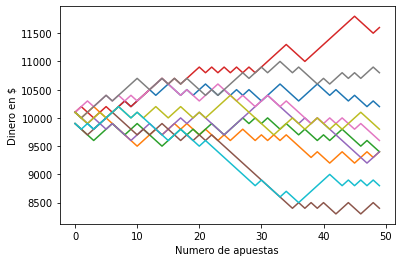

In [40]:
final_funds = []
for i in range(10):
    ending_fund = play(10000, 100, 50)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

## Ahora, para un total de apuestas de 5, 10 y 1000....

### Ahora para mil iteraciones

[10300, 10300, 9900, 9500, 10100, 9500, 10100, 10300, 9700, 9900, 10300, 10100, 10100, 10100, 10300, 10100, 9700, 9700, 9900, 9900, 10100, 10100, 10100, 9700, 10100, 10100, 10300, 9700, 10100, 9900, 9900, 10100, 10100, 10100, 10100, 9900, 10100, 9900, 9700, 9700, 10300, 9700, 9900, 10100, 9700, 9900, 10100, 10100, 10100, 9700, 9700, 10300, 10100, 10100, 9700, 9900, 10100, 10100, 10300, 10100, 10100, 10100, 9500, 9900, 9900, 9900, 9700, 10300, 10100, 10100, 9900, 10300, 9500, 10100, 9900, 9500, 10500, 10100, 9900, 9900, 10500, 9900, 9900, 10100, 9900, 10100, 9900, 9500, 10100, 10100, 10100, 9900, 10100, 9700, 9700, 10100, 10100, 10100, 10100, 10100, 9900, 9700, 9700, 9900, 9700, 9900, 9700, 9900, 9700, 10300, 9900, 9900, 9700, 9900, 10100, 9700, 9900, 9500, 9900, 10100, 9900, 9700, 10100, 10100, 10300, 9900, 9500, 9900, 9900, 9900, 10300, 9900, 10100, 9700, 9900, 10300, 9900, 9700, 10300, 9900, 10100, 10100, 10500, 9900, 9700, 9700, 10100, 10500, 10300, 9900, 9700, 9900, 10300, 9900, 10

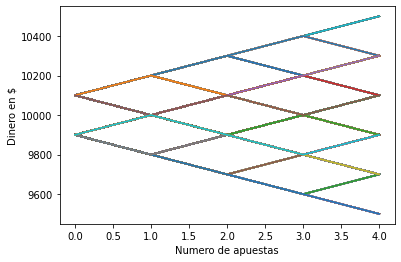

In [41]:
final_funds = []
for i in range(1000):
    ending_fund = play(10000, 100, 5)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

[10200, 10200, 9800, 9800, 10000, 10000, 10000, 9800, 10400, 9400, 10000, 10400, 9800, 10200, 9600, 10200, 10200, 10000, 9600, 10000, 10400, 9800, 9800, 10400, 10000, 10000, 9600, 9400, 9800, 10200, 10400, 9200, 9800, 10200, 9400, 9800, 10200, 10000, 10200, 9800, 9400, 10400, 9600, 10800, 9600, 9600, 10200, 10400, 10000, 9600, 9600, 9600, 10200, 10000, 10200, 9800, 9600, 10200, 9400, 9800, 9800, 9400, 10400, 10000, 9800, 9800, 10200, 10200, 9800, 10400, 10600, 10200, 10000, 10200, 9600, 10000, 10200, 10200, 10600, 10200, 10000, 10000, 9800, 10000, 10000, 10000, 9800, 9800, 9800, 10200, 9800, 10000, 9800, 9400, 9600, 9600, 10000, 9800, 10200, 9400, 10000, 10200, 10000, 9800, 10000, 9600, 10000, 9600, 10000, 9600, 10200, 10000, 9600, 10600, 10600, 10200, 10200, 9600, 10000, 9600, 10000, 9800, 10000, 9800, 9800, 9600, 10200, 9600, 10000, 9600, 9600, 9400, 9800, 10000, 9800, 10000, 10200, 9800, 9400, 10000, 10200, 10200, 9800, 9800, 10400, 9800, 10200, 10200, 9800, 10000, 10200, 10000, 100

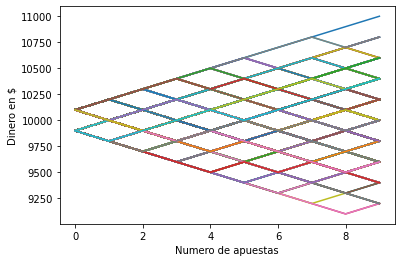

In [42]:
final_funds = []
for i in range(1000):
    ending_fund = play(10000, 100, 10)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

[3800, 9400, 6800, 6800, 7000, 12600, 8800, 6800, 6400, 12000, 9400, 7200, 16400, 8200, 9000, 4000, 16000, 9200, 11000, 5000, 9600, 3800, 9600, 6600, 14600, 5800, 6600, 5400, 11000, 9600, 8600, 6000, 5000, 9800, 9400, 7400, 7600, 4800, 5800, 7800, 12600, 15000, 13000, 5000, 4600, 7400, 1600, 6800, 600, 7400, 6000, 4600, 13600, 5800, 3200, 7800, 7400, 8400, 10800, 12600, 14800, 6000, 5600, 10400, 8200, 2400, 4400, 2200, 7800, 12000, 4400, 9800, 6600, 9600, 5200, 9600, 8000, 7200, 9000, 8000, 11000, 9600, 6800, 8600, 4600, 5800, 10800, 11000, 6000, 8200, 8000, 5000, 11000, 5400, 6200, 7200, 3000, 6800, 5600, 8200, 10000, 3600, 2200, 7600, 1000, 8000, 11600, 10600, 9800, 6000, 10000, 8800, 14600, 10800, 6600, 7600, 3600, 10200, 10800, 8600, 6400, 8600, 9000, 9400, 9600, 8400, 9400, 12200, 10000, 800, 12400, 8400, 7400, 8600, 7600, 7200, 9000, 9800, 7800, 11600, 6600, 4800, 9400, 200, 1600, 7000, 12800, 4400, 6200, 10000, 5800, 9400, 8800, 8800, 16600, 4000, 7400, 7400, 5400, 5000, 9400, 7

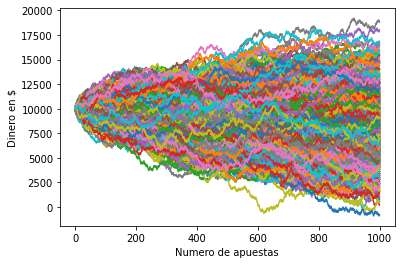

In [43]:
final_funds = []
for i in range(1000):
    ending_fund = play(10000, 100, 1000)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

### ¿Qué conclusiones puedes inferir a partir del ejercicio anterior?

La casa siempre gana :( o casi siempre :( la mayoría del tiempo ':D

----

Tenga en cuenta que estos porcentajes son para nuestro juego figurativo y pueden modificarse....


-------

Al igual que con cualquier modelo de pronóstico, la simulación solo será tan buena como las estimaciones que hagamos. Es importante recordar que la simulación de Monte Carlo solo representa probabilidades y no certeza. Sin embargo, la simulación de Monte Carlo puede ser una herramienta valiosa a la hora de pronosticar un futuro desconocido.